# Python Implementation of k-means clustering using scikit-learn

Suppose you are the owner of a clothing outlet. Your aim is to achieve as much profit possible by selling your branded clothes and accessories. If you are an intelligent businessman, you would like to target a section of the customers who would like to spend money for buying your products. Hence, you develope a machine learning model which will help you to segment/categorize the customers visiting your shop,here analysing them based on two paramaters: 1) Annual Income(in $) and 2)Spending Score (in a range from 1-100) , since it will help us in 2D visualisation of the k-means clustering algorithm

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing necessary libraries

In the code below, the numpy we have imported for the performing mathematics calculation, matplotlib is for plotting the graph, and pandas are for managing the dataset.


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Step 1: $Load$ $the$ $dataset$

Importing the Dataset:
Next, we will import the dataset that we need to use. So here, we are using the Mall_Customer_data.csv dataset. It can be imported using the below code:

In [3]:
# Importing the dataset
df = pd.read_csv('/content/drive/My Drive/Dataset/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Step 2: $Store$ $the$ $input$ $data$
Extracting Independent Variables

Here we don't need any dependent variable for data pre-processing step as it is a clustering problem, and we have no idea about what to determine. So we will just add a line of code for the matrix of features.

In the given dataframe, the columns such as customer ID, gender, age are not the determining factors which will affect the prediction of the category of the customer(like careful,standard,target, careless, sensible)

As we can see, we are extracting only 3rd and 4th feature. It is because we need a 2d plot to visualize the model, and some features are not required

In [4]:
X=df.iloc[:,[3,4]].values

# Step 3: $Finding$ $the$ $optimal$ $number$ $of$ $clusters$ $using$ $the$ $elbow$ $method$
In the third step, we will try to find the optimal number of clusters for our clustering problem. So, as discussed above, here we are going to use the elbow method for this purpose.

As we know, the elbow method uses the WCSS concept to draw the plot by plotting WCSS values on the Y-axis and the number of clusters on the X-axis. So we are going to calculate the value for WCSS for different k values ranging from 1 to 10. Below is the code for it:

As we can see in the above code, we have used the KMeans class of sklearn. cluster library to form the clusters.

Next, we have created the wcss_list variable to initialize an empty list, which is used to contain the value of wcss computed for different values of k ranging from 1 to 10.

After that, we have initialized the for loop for the iteration on a different value of k ranging from 1 to 10; since for loop in Python, exclude the outbound limit, so it is taken as 11 to include 10th value.

The rest part of the code is similar as we did in earlier topics, as we have fitted the model on a matrix of features and then plotted the graph between the number of clusters and WCSS.



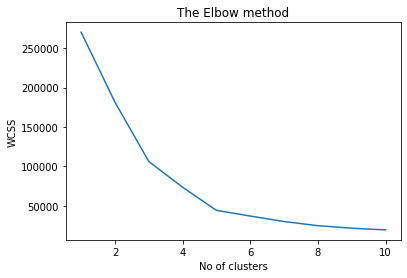

In [5]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.title("The Elbow method")
plt.show()

#Step 4: $Training$ $the$ $K-means$ $algorithm$ $on$ $the$ $training$ $dataset$
As we have got the number of clusters, so we can now train the model on the dataset.

To train the model, we will use the same two lines of code as we have used in the above section, but here instead of using i, we will use 5, as we know there are 5 clusters that need to be formed. The code is given below:

In [6]:
# Applying Kmeans
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

The predicted class of customer has been displayed below

In [8]:
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

# Step 5: Cluster visualization
The last step is to visualize the clusters. As we have 5 clusters for our model, so we will visualize each cluster one by one.

To visualize the clusters will use scatter plot using plt.scatter() function of matplotlib.

In lines of code below, we have written code for each clusters, ranging from 1 to 5. The first coordinate of the plt.scatter, i.e., x[y_predict == 0, 0] containing the x value for the showing the matrix of features values, and the y_predict is ranging from 0 to 1.

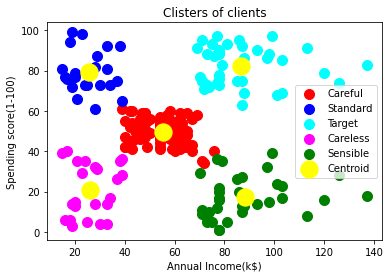

In [7]:
#Visulising the clusters
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Careful')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='cyan',label='Target')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='magenta',label='Careless')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='green',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid') 
plt.title("Clisters of clients")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending score(1-100)")
plt.legend()
plt.show()